In [7]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import seaborn as sns
from typing_extensions import dataclass_transform
from google.colab import files

In [8]:
!pip install nltk

In [9]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, RegexpStemmer, WordNetLemmatizer
from textblob import TextBlob

In [10]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import joblib

In [12]:
Data_1 = pd.read_csv('/content/DataP_1.csv')
Data_2 = pd.read_csv('/content/DataP_2.csv')
Data_3 = pd.read_csv('/content/DataP_3.csv')
Data_1 = Data_1.dropna()
Data_2 = Data_2.dropna()
Data_3 = Data_3.dropna()

In [13]:
vectorizer_3 = TfidfVectorizer()
T3 = vectorizer_3.fit_transform(Data_3['Tweet_P'])

joblib.dump(vectorizer_3, 'tfidf_vectorizer_3.pkl')

L3 = Data_3['Label']
T3_train, T3_test, L3_train, L3_test = train_test_split(T3, L3, test_size=0.2, random_state=42)
print(T3_train.shape, T3_test.shape, L3_train.shape, L3_test.shape)

(45389, 55411) (11348, 55411) (45389,) (11348,)


In [14]:
T1 = Data_1['Tweet_P']
L1 = Data_1['Label']
T1_train, T1_test, L1_train, L1_test = train_test_split(T1, L1, test_size=0.2, random_state=42)
print(T1_train.shape, T1_test.shape, L1_train.shape, L1_test.shape)

(19826,) (4957,) (19826,) (4957,)


In [15]:
T2 = Data_2['Tweet_P']
L2 = Data_2['Label']
T2_train, T2_test, L2_train, L2_test = train_test_split(T2, L2, test_size=0.2, random_state=42)
print(T2_train.shape, T2_test.shape, L2_train.shape, L2_test.shape)

(25563,) (6391,) (25563,) (6391,)


In [16]:
#Logistic Regression Model
model_3 = LogisticRegression()
model_3.fit(T3_train, L3_train)

LogisticRegression()

In [17]:
joblib.dump(model_3, 'logistic_regression_model_3.pkl')
model_3 = joblib.load('logistic_regression_model_3.pkl')

In [18]:
L3_predicted = model_3.predict(T3_test)
print("Model trained on Data Source 3 & Tested on Data Source 3")
print("Accuracy Score 1: \n", accuracy_score(L3_test, L3_predicted))
print("Confusion Matrix: \n", confusion_matrix(L3_test, L3_predicted))
print("Classification Report: \n", classification_report(L3_test, L3_predicted))

Model trained on Data Source 3 & Tested on Data Source 3
Accuracy Score 1: 
 0.9377863940782517
Confusion Matrix: 
 [[6376  156]
 [ 550 4266]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95      6532
           1       0.96      0.89      0.92      4816

    accuracy                           0.94     11348
   macro avg       0.94      0.93      0.94     11348
weighted avg       0.94      0.94      0.94     11348



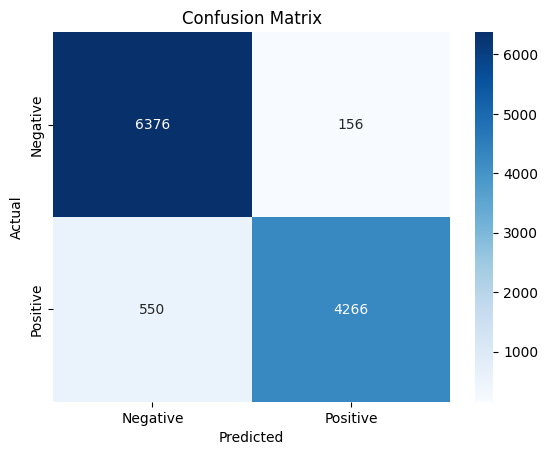

In [19]:
sns.heatmap(confusion_matrix(L3_test, L3_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
vectorizer_3 = joblib.load('tfidf_vectorizer_3.pkl')
T1_test = vectorizer_3.transform(T1_test)
model_3 = joblib.load('logistic_regression_model_3.pkl')
L1_predicted = model_3.predict(T1_test)
print("Model trained on Data Source 3 & Tested on Data Source 1")
print("Accuracy Score 1: \n", accuracy_score(L1_test, L1_predicted))
print("Confusion Matrix: \n", confusion_matrix(L1_test, L1_predicted))
print("Classification Report: \n", classification_report(L1_test, L1_predicted))

Model trained on Data Source 3 & Tested on Data Source 1
Accuracy Score 1: 
 0.9342344159774056
Confusion Matrix: 
 [[ 602  233]
 [  93 4029]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.72      0.79       835
           1       0.95      0.98      0.96      4122

    accuracy                           0.93      4957
   macro avg       0.91      0.85      0.87      4957
weighted avg       0.93      0.93      0.93      4957



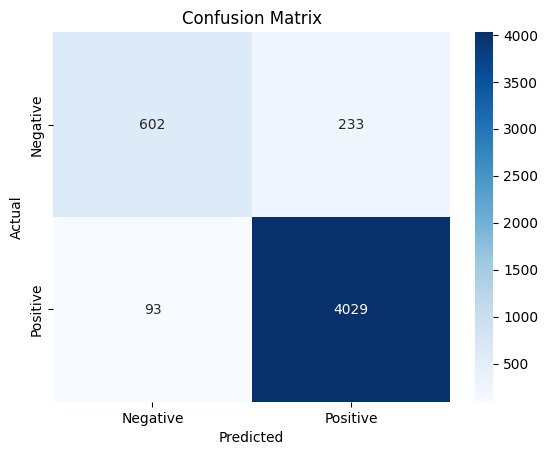

In [21]:
sns.heatmap(confusion_matrix(L1_test, L1_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [22]:
vectorizer_3 = joblib.load('tfidf_vectorizer_3.pkl')
T2_test = vectorizer_3.transform(T2_test)
model_3 = joblib.load('logistic_regression_model_3.pkl')
L2_predicted = model_3.predict(T2_test)
print("Model trained on Data Source 3 & Tested on Data Source 2")
print("Accuracy Score 1: \n", accuracy_score(L2_test, L2_predicted))
print("Confusion Matrix: \n", confusion_matrix(L2_test, L2_predicted))
print("Classification Report: \n", classification_report(L2_test, L2_predicted))

Model trained on Data Source 3 & Tested on Data Source 2
Accuracy Score 1: 
 0.9529025191675794
Confusion Matrix: 
 [[5891   65]
 [ 236  199]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98      5956
           1       0.75      0.46      0.57       435

    accuracy                           0.95      6391
   macro avg       0.86      0.72      0.77      6391
weighted avg       0.95      0.95      0.95      6391



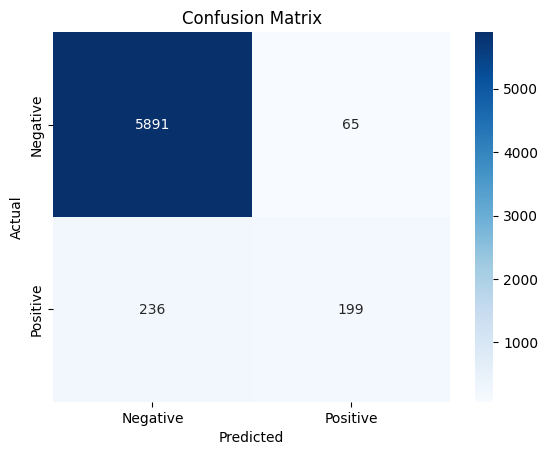

In [23]:
sns.heatmap(confusion_matrix(L2_test, L2_predicted), annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()